# Από τους Νευρώνες στα <br/>Νευρωνικά Δίκτυα Γ'

Εμπνευσμένο από το [TensorFlow playground](https://playground.tensorflow.org/).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import numpy as np

tf.random.set_seed(13)

* Τι συμβαίνει αν τα δεδομένα μας δεν είναι γραμμικώς διαχωρίσιμα;

* Τότε δεν μπορούν να διαχωριστούν από έναν μόνο νευρώνα.

* Θα φτιάξουμε ένα νευρωνικό δίκτυο, συνδέοντας τις εξόδους νευρώνων στις εισόδους άλλων.

* Τους νευρώνες τους παραθέτουμε σε *στρώματα* (layers) ή επίπεδα.

* Το πρώτο στρώμα ονομάζεται *στρώμα εισόδου* (input layer).

* Το τελευταίο στρώμα ονομάζεται *στρώμα εξόδου* (output layer).

* Τα ενδιάμεσα στρώματα ονομάζονται *κρυμμένα στρώματα*  (hidden layers).

<img src="ann_two_hidden_layers.png" width="500"/>

* Θα δημιουργήσουμε λοιπόν ένα σύνολο δεδομένων που δεν είναι γραμμικώς διαχωρίσιμα.

* Τα δεδομένα θα εντάσσονται σε ομόκεντρους κύκλους.

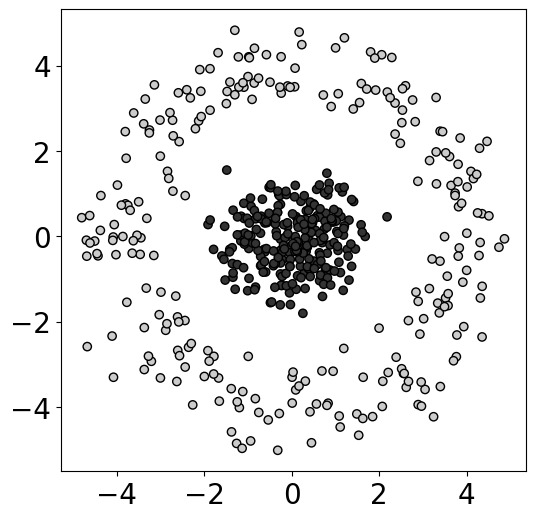

In [2]:
from sklearn.datasets import make_circles
cm_data = ListedColormap(['0.8', '0.2'])

mul_factor = 4
data, labels = make_circles(500,
                            shuffle=True,
                            noise=0.13,
                            factor=0.2,
                            random_state=13)
data = data * mul_factor

x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data,
           edgecolors='k')

plt.xticks(range(-4, 5, 2))
plt.tick_params(labelsize=20)

* Το νευρωνικό μας δίκτυο θα αποτελείται από:

  1. Ένα στρώμα εισόδου, με δύο νευρώνες.
  
  2. Ένα κρυμμένο στρώμα, με τέσσερεις νευρώνες, που συνδέονται με το στρώμα εισόδου.
  
  3. Ένα δεύτερο κρυμμένο στρώμα, με δύο νευρώνες, που συνδέονται με το πρώτο κρυμμένο στρώμα.
  
  4. Ένα στρώμα εξόδου, με έναν νευρώνα.

In [3]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(4, activation=tf.nn.tanh), 
    keras.layers.Dense(2, activation=tf.nn.tanh),
    keras.layers.Dense(1, activation=tf.nn.tanh)
])

<img src="nn_concentric_circles.png" width="650"/>

* Με τη μέθοδο `summary()` μπορούμε να πάρουμε μια σύνοψη του μοντέλου (χωρίς το στρώμα εισόδου).

* H `summary()` μας δίνει και τις διαστάσεις του κάθε στρώματος. 

* Οι διαστάσεις εδώ είναι το πόσες τιμές δίνει στην έξοδο το κάθε στρώμα.

* Οι τιμές είναι ο αριθμός των νευρώνων, για κάθε φουρνιά. 

* Η τιμή `None` αντιστοιχεί στο μέγεθος της κάθε φουρνιάς, που θα γίνει γνωστό τη στιγμή της εκπαίδευσης.

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

* Το πρώτο κρυμμένο στρώμα έχει τέσσερεις νευρώνες. Κάθε ένας από αυτούς έχει δύο βάρη και μία πόλωση, άρα έχουμε $4 \times (2+1) = 12$ παραμέτρους.

* Το δεύτερο κρυμμένο στρώμα έχει δύο νευρώνες. Κάθε ένας από αυτούς έχει τέσσερα βάρη και μία πόλωση, άρα έχουμε $2 \times (4 + 1) = 10$ παραμέτρους.

* Το στρώμα εξόδου έχει έναν νευρώνα με δύο βάρη και μία πόλωση, άρα $2 + 1 = 3$ παραμέτρους.

* Το στρώμα εισόδου απλώς δίνει τις τιμές στο πρώτο κρυμμένο επίπεδο, άρα δεν έχει παραμέτρους.

* Μπορούμε να πάρουμε και μια γραφική απεικόνιση του μοντέλου αν έχουμε εγκαταστήσει το πακέτο `pydot` ή `pydot-ng` ή `pydotplus`.

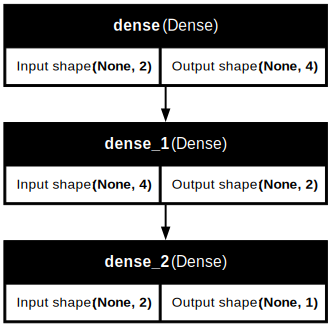

In [5]:
from IPython.display import SVG, display
from keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

* Αυτή τη φορά χρησιμοποιήσαμε μια άλλη συνάρτηση ενεργοποίησης, την tanh.

* Αυτή είναι η *υπερβολική εφαπτομένη* (hyperbolic tangent).

* Προφέρεται «tan-H» ή «then» ή «thents» με ένα μαλακό «th», όπως το «thanks».

* Μοιάζει με τη σιγμοειδή συνάρτηση, αλλά διαφέρει από αυτήν στο ότι η έξοδος κυμαίνεται από το -1 to +1.

* Άρα αν η σταθμισμένη είσοδος είναι αρνητική, παίρνουμε αρνητική έξοδο, ως ανασταλτικό σήμα.

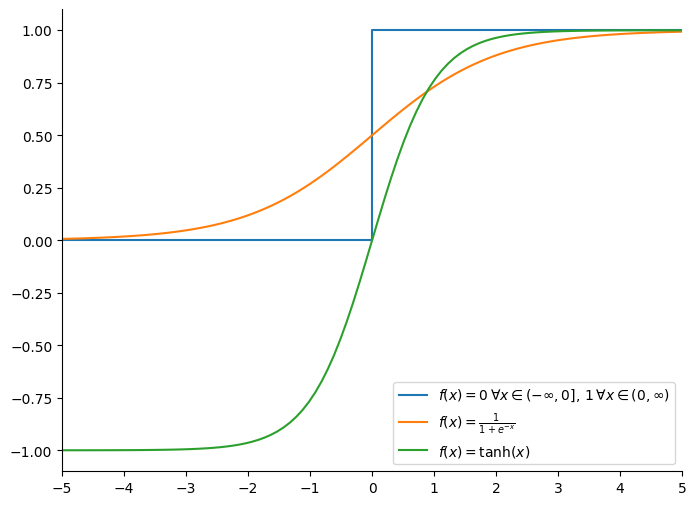

In [6]:
fig = plt.figure(figsize=(8, 6))

ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
all_x = np.append(x, -x[::-1])
all_y = np.append(y, np.ones_like(-x[::-1]))
plt.plot(all_x, all_y, label= r"$f(x) = 0\, \forall x \in (-\infty, 0],\, 1\, \forall x \in (0, \infty)$")
all_s_y = 1 / (1 + np.exp(-all_x))
all_t_y = np.tanh(all_x)
plt.plot(all_x, all_s_y, label=r"$f(x) = \frac{1}{1 + e^{-x}}$")
plt.plot(all_x, all_t_y, label=r"$f(x) = \tanh(x)$")
_ = plt.legend(loc='lower right')

* Πώς μαθαίνει αυτό το δίκτυο;

* Μέσω του αλγορίθμου *οπισθομετάδοσης* (backpropagation).

* Για κάθε φουρνιά, οι νευρώνες ενεργοποιούνται από τα αριστερά προς τα δεξιά.

<img src="nn_concentric_circles_1.png" width="650"/>

<img src="nn_concentric_circles_2.png" width="650"/>

<img src="nn_concentric_circles_3.png" width="650"/>

<img src="nn_concentric_circles_4.png" width="650"/>

* Όταν φτάσουμε στην έξοδο, υπολογίζουμε την απώλεια.

* Με βάση αυτή, υπολογίζουμε πόσο πρέπει να διορθώσουμε τα βάρη και την πόλωση του στρώματος εξόδου.

<img src="nn_concentric_circles_4.png" width="650"/>

* Αφού διορθώσουμε το στρώμα εξόδου, μπορούμε να διορθώσουμε τα βάρη και την πόλωση στο δεύτερο κρυμμένο στρώμα.

<img src="nn_concentric_circles_3.png" width="650"/>

* Αφού διορθώσουμε το δεύτερο κρυμμένο στρώμα, μπορούμε να διορθώσουμε τα βάρη και την πόλωση στο πρώτο κρυμμένο στρώμα.

<img src="nn_concentric_circles_2.png" width="650"/>

* Έτσι προχωράμε μέχρι το πρώτο κρυμμένο στρώμα, όπου δεν έχουμε κάτι να διορθώσουμε.

* Επαναλαμβάνουμε αυτή τη διαδικασία μπρος-πίσω με τα επόμενα δεδομένα μας, κ.ο.κ.

<img src="nn_concentric_circles_1.png" width="650"/>

* Για να γίνουν όλα αυτά, δημιουργούμε τον βελτιστοποιητή.

In [7]:
sgd = optimizers.SGD(learning_rate=0.1)

* Θέτουμε τον βελτιστοποιητή, την απώλεια, και την μετρική της απόδοσης με τη μέθοδο `compile()`.

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

* Καλούμε τη μέθοδο `fit()`.

* Θα χρησιμοποιήσουμε 150 εποχές και φουρνιές των 10 δειγμάτων, άρα κάθε εποχή θα έχει $500/10 = 50$ φουρνιές.

In [9]:
model.fit(data, labels, batch_size=10, epochs=150)

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5472 - loss: 0.2743 
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6020 - loss: 0.2305 
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.1903
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8685 - loss: 0.1383 
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.1060 
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9102 - loss: 0.0810
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.0510
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0287 
Epoch 9/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0212 
Epoch 10/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0178 
Epoch 11/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0158
Epoch 12/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

* Για να δούμε τι καταφέραμε.

1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step


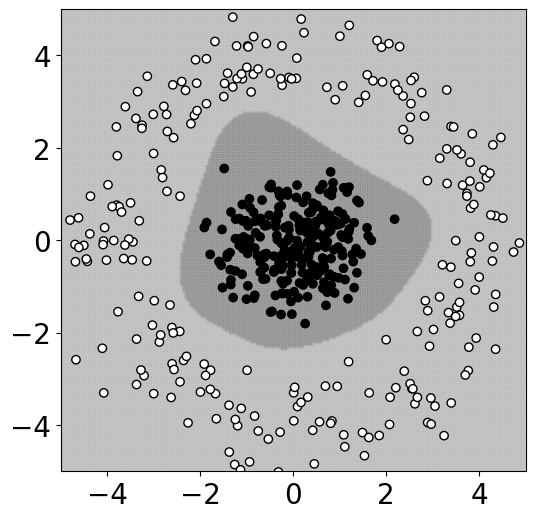

In [10]:
offset = 0.01

x_min, x_max = -5, 5 
y_min, y_max = -5, 5 

h = .05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h),
                     np.arange(y_min, y_max+h, h))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

z = predictions.reshape(xx.shape)

cm_mesh = ListedColormap(['0.7', '0.5'])

cm_data_mesh = ListedColormap(['1', '0'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.pcolormesh(xx, yy, z,
              cmap=cm_mesh,
              shading='gouraud',
              alpha=0.4)


ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data_mesh,
           linewidth=1,
           edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-4, 5, 2))
plt.tick_params(labelsize=20)

* Επομένως καταφέραμε να ταξινομήσουμε μη γραμμικώς διαχωρίσιμα δεδομένα.

* Πράγματι, παιρνόντας από τον ένα νευρώνα σε δίκτυα νευρώνων, μπορούμε να υπολογίσουμε, τελικά, οτιδήποτε θα μπορούσαμε να υπολογίσουμε με έναν υπολογιστή.

* Με άλλα λόγια: ένα νευρωνικό δίκτυο μπορεί να υπολογίσει οτιδήποτε μπορούμε να υπολογίσουμε σε έναν υπολογιστή με άλλες μεθόδους.

* Η δύναμη των νευρωνικών δικτύων έγκειται στη συσσώρευση στρωμάτων και διασυνδέσεων ώστε να μπορούν να επιλύσουν ολοένα και πιο περίπλοκα προβλήματα.